In [1]:
# Importing the necessary libraries for EDA.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset.

iris_data = pd.read_csv('iris.csv')
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
iris_data.shape

(150, 5)

In [4]:
iris_data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# No Duplicated observations

iris_data.duplicated().sum()

3

In [8]:
# No null values in the data.

iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

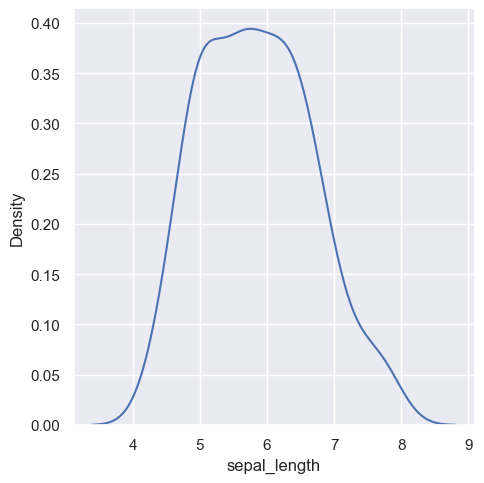

In [9]:
# distribution of sepal length column
sns.displot(iris_data['sepal_length'],kind = 'kde')
plt.show()

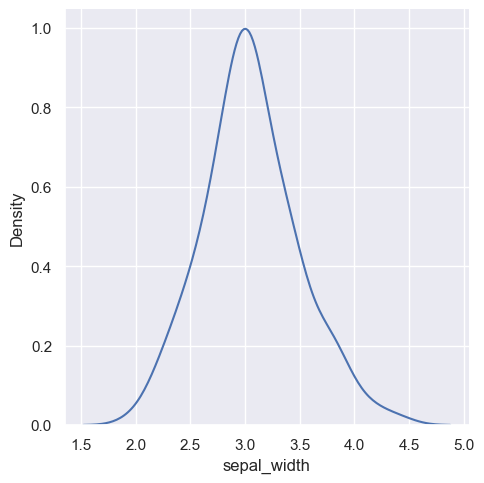

In [10]:
# distribution of sepal width column
sns.displot(iris_data['sepal_width'],kind = 'kde')
plt.show()

sepal_width distribution has a peak at 3.0

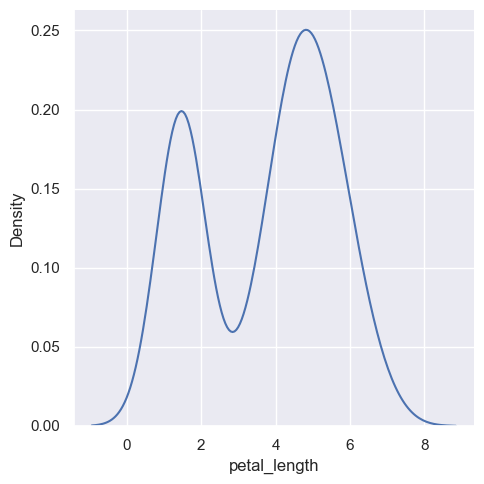

In [11]:
# distribution of petal length column
sns.displot(iris_data['petal_length'],kind = 'kde')
plt.show()

Petal length column shows two peaks in the distribution.

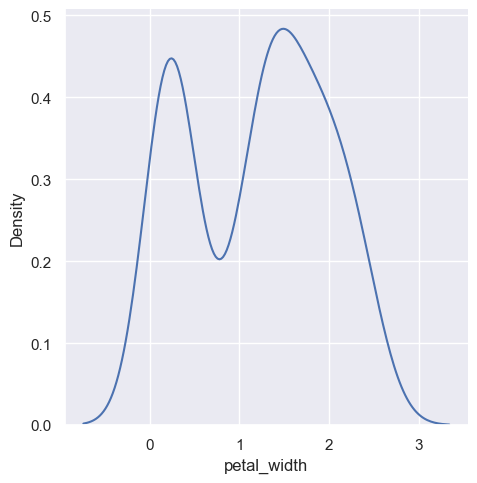

In [12]:
# distribution of petal width column
sns.displot(iris_data['petal_width'],kind = 'kde')
plt.show()

Petal width column shows two peaks in the distribution . 

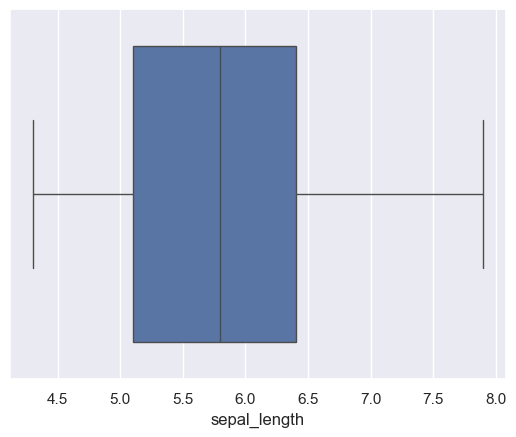

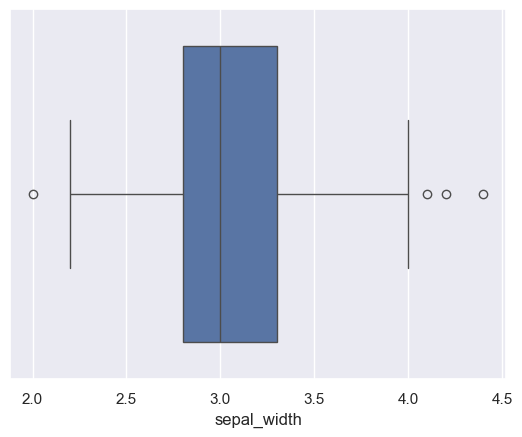

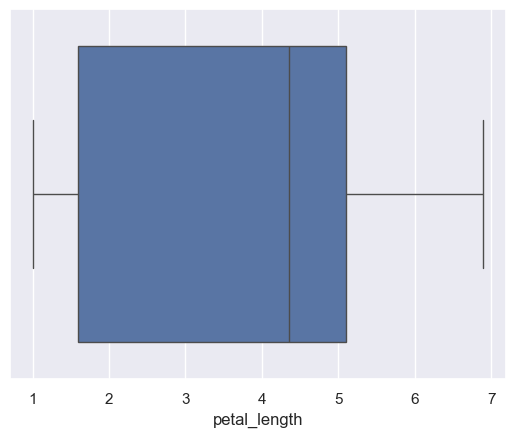

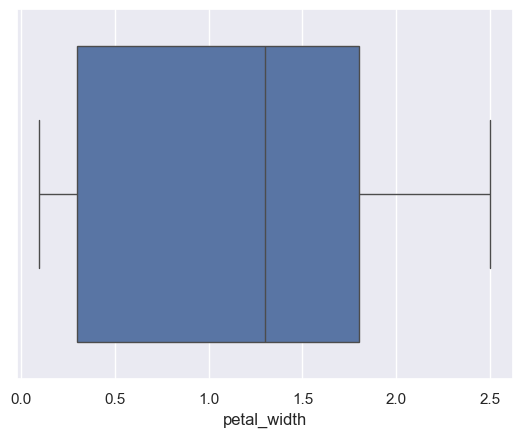

In [13]:
# Checking for outliers in a overall column.

independent_var = list(iris_data.columns)[:-1]
target = 'species'
# box plot for each column
for col in independent_var:
    sns.boxplot(data = iris_data,x = col)
    plt.show()
    


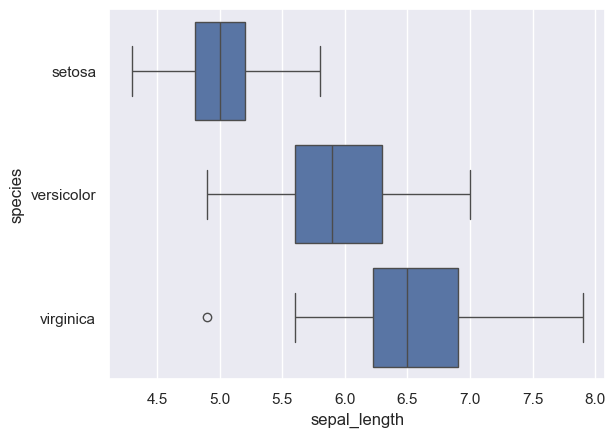

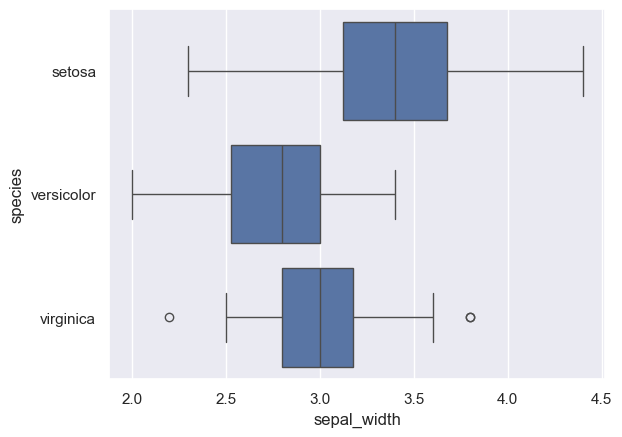

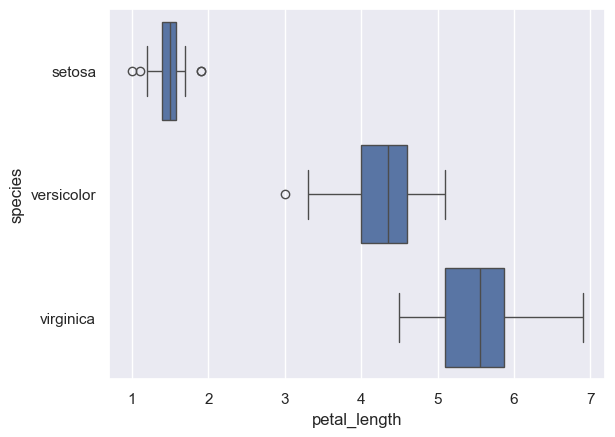

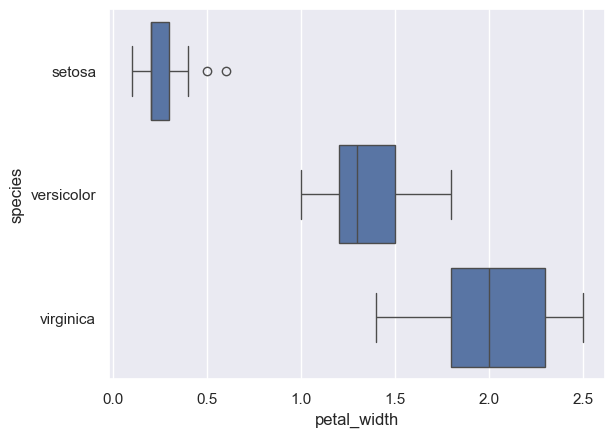

In [14]:
# Checking for outliers based on the categories of the target column.

for col in independent_var:
    sns.boxplot(data = iris_data,x = col,y = target)
    plt.show()

** SEPAL LENGTH :
 We see a clear separation in the mean values of sepal length of setosa , versicolor and virginica.
 mean values of sepal length for setosa is at 5.0 , for versicolor at 5.8 , and for virginica at 6.5.
 There IQR range is also distinguised and can provide a easy prediction of flowering species based on sepal length . 
 However lower and upper extreme sepal lengths for each class coincides with the other class . 


 SEPAL WIDTH :

 IQR of setosa's sepal width is clearly separable from the rest two species . The range of setosa sepal width is around [3.2 , 3.6]  
 Though the boundaries of sepal width of setosa and virginica slightly coincides . We can also see presence of two outliers in the sepal width of virginica

 PETAL LENGTH AND PETAL WIDTH :

 petal length and petal width of setosa and virginica are completely distinguisable from the other two species . 
 petal length of setosa is less than 2 even in the extreme values.
 virginica has the longest petal lengths. The mean is around 5.6.The IQR range is around [5.1 , 5.8]
 for versicolor the petal length IQR range is around [4,4.5]
 The petal width IQR of setosa is less than 0.5 , while for versicolor the range is [1.2,1.5] and for virginica it is [1.7,2.3]**

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

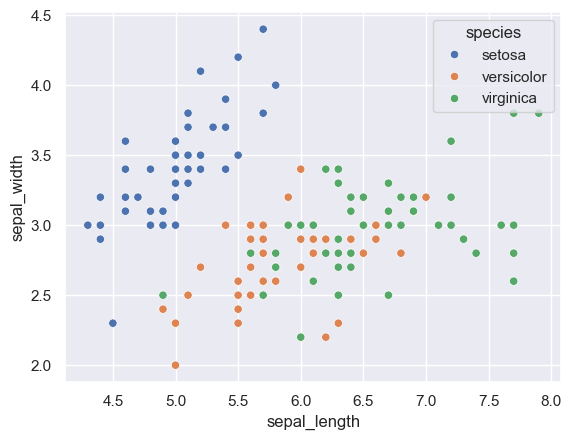

In [15]:
# scatter plot
sns.scatterplot(data = iris_data ,x = 'sepal_length',y = 'sepal_width',hue = 'species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

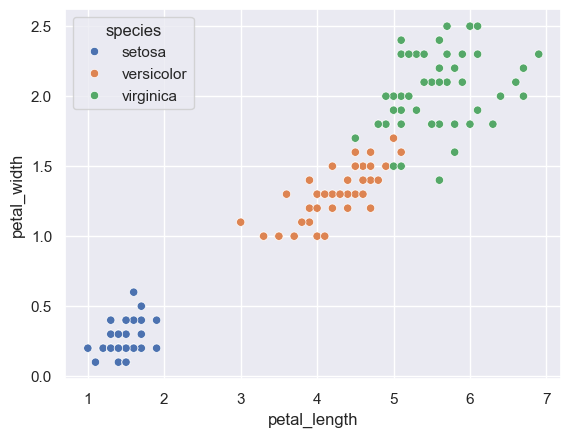

In [16]:
sns.scatterplot(data =iris_data,x = 'petal_length',y = 'petal_width',hue = 'species')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

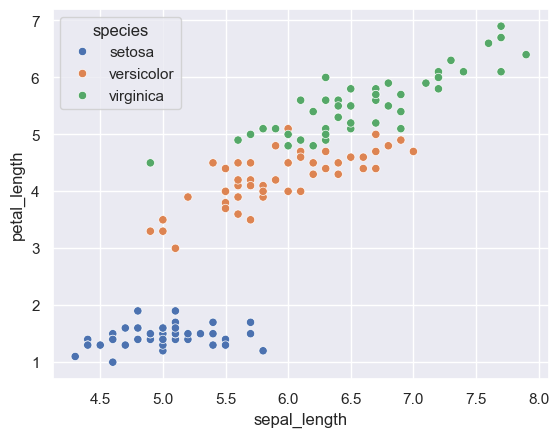

In [17]:
sns.scatterplot(data = iris_data , x = 'sepal_length',y = 'petal_length' , hue = 'species')

<Axes: xlabel='sepal_width', ylabel='petal_width'>

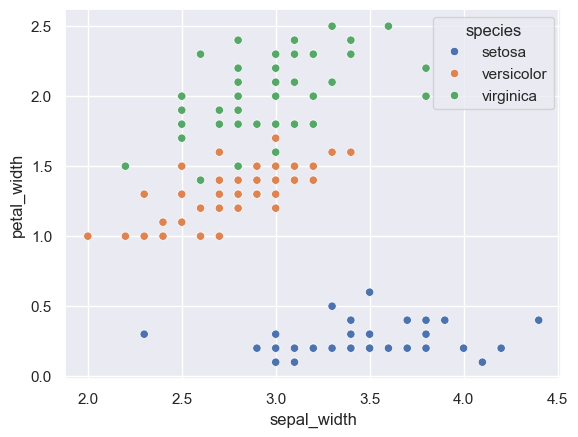

In [18]:
sns.scatterplot(data = iris_data , x = 'sepal_width',y = 'petal_width' , hue = 'species')

<Axes: xlabel='sepal_length', ylabel='petal_width'>

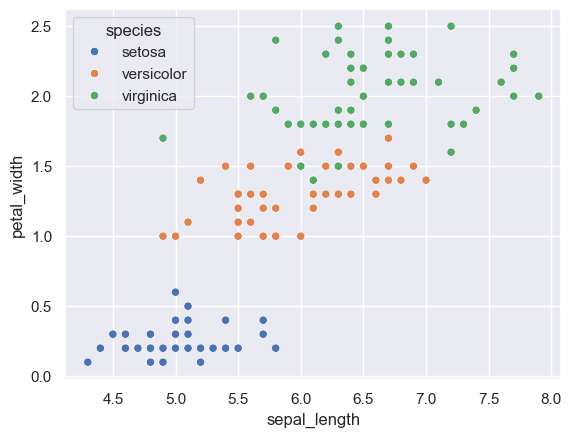

In [19]:
sns.scatterplot(data = iris_data , x = 'sepal_length',y = 'petal_width' , hue = 'species')

<Axes: xlabel='sepal_width', ylabel='petal_length'>

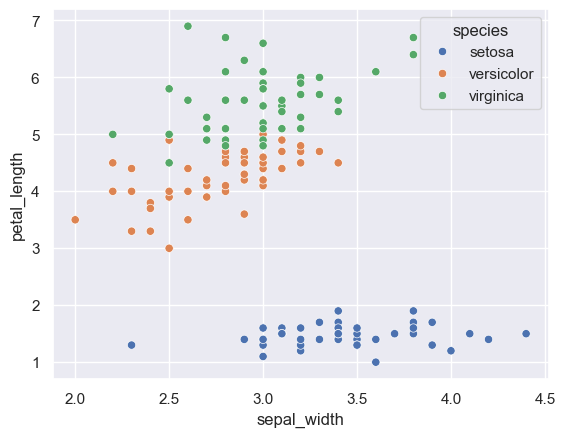

In [20]:
sns.scatterplot(data = iris_data , x = 'sepal_width',y = 'petal_length' , hue = 'species')

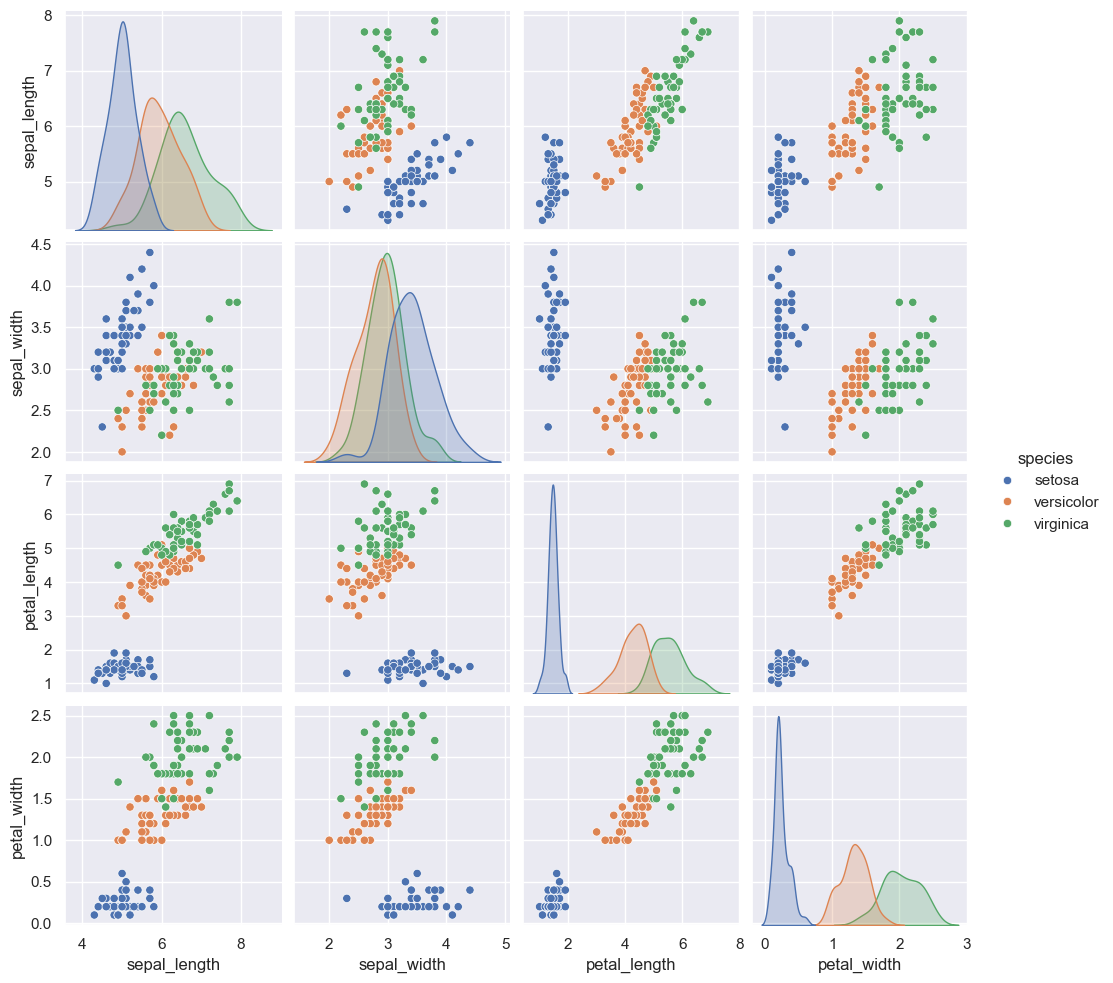

In [21]:
sns.pairplot(data = iris_data , hue = 'species')

In [34]:
df_corr = iris_data[independent_var].corr()
df_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

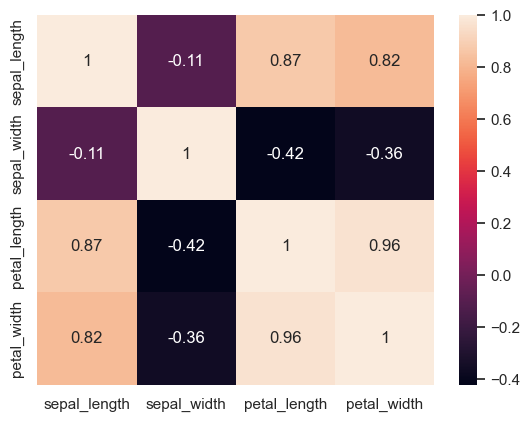

In [35]:
sns.heatmap(data = df_corr,annot=True)

Petal length and petal width columns have high positive correlation of 0.96 .
Sepal length has high positive correlation with petal length [0.87] and petal width [0.82] .
Sepal length has weak negative correlation with sepal width .
Sepal width has significant negative correlation with petal width[-0.36] and petal length[-0.42] .

Conclusions from EDA on iris dataset :

The iris dataset is a small dataset with only 150 observations and 5 features

The dataset is giving the information about a flowering plant which has 3 different species namely setosa , versicolor and virginica.

The dataset provides the sepal_length , sepal_width , petal_length and petal_width of the sample specimens and also provides the flowering species of the specimens.

The dataset consists of no duplicated observations .
The dataset has no missing values present.
The dataset consist of equal number of specimens for each species class.


The overall distribution of sepal length column irrespective of species is similiar to normal distribution with peak around 5.7 .
The overall distribution of sepal width column irrespective of species is similiar to normal distribution with peak around 3.0 .
Petal length column shows two peaks in the distribution.
Petal width column also shows two peaks in the distribution . 

According to the boxplots , absence of outliers in all the columns majorly.

SEPAL LENGTH :
We see a clear separation in the mean values of sepal length of setosa , versicolor and virginica.
mean values of sepal length for setosa is at 5.0 , for versicolor at 5.8 , and for virginica at 6.5.
There IQR range is also distinguised and can provide a easy prediction of flowering species based on sepal length . 
However lower and upper extreme sepal lengths for each class coincides with the other class . 


SEPAL WIDTH :

IQR of setosa's sepal width is clearly separable from the rest two species . The range of setosa sepal width is around [3.2 , 3.6]  
Though the boundaries of sepal width of setosa and virginica slightly coincides . We can also see presence of two outliers in the sepal width of virginica

PETAL LENGTH AND PETAL WIDTH :

petal length and petal width of setosa and virginica are completely distinguisable from the other two species . 
petal length of setosa is less than 2 even in the extreme values.
virginica has the longest petal lengths. The mean is around 5.6.The IQR range is around [5.1 , 5.8]
for versicolor the petal length IQR range is around [4,4.5]
The petal width IQR of setosa is less than 0.5 , while for versicolor the range is [1.2,1.5] and for virginica it is [1.7,2.3]
 